In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

In [2]:
def feature_selection_RandomForest(db_full):
    """Функция отбора признаков методом случайного леса. Функция возвращает
    обученную модель"""
    
    #отбор признаков с помощью модели случайного леса

    X = db_full.select_dtypes(exclude=['object']).copy()
    if 'Flow Byts/s' in db_full.columns:
        X.drop(columns=['Flow Byts/s', 'Flow Pkts/s', 'Category_Label'],
               axis = 1, inplace=True)
    else:
        X.drop(columns=['Category_Label'],
               axis = 1, inplace=True)
    
    y = db_full['Category_Label']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    X_train.shape, y_train.shape

    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    
    
    return clf, X

In [14]:
def encode_class(db):
    """Функция кодирует метки класса и возвращает датасет с новым признаком Category_Label"""
    categories = {}
    for key, value in enumerate(db['Label'].unique()):
        categories[value] = key + 1
    db['Category_Label'] = db.loc[:, 'Label'].map(categories)
    
    return db, categories

In [4]:
def preparing_data(db_full):
    """Функция кодирует метки целевого признака. Отбирает признаки методом случайного леса. 
    Возвращает готовые для обучения моделей данные"""    
    
    #кодирование меток
    
    db_full = encode_class(db_full)

    #исключение признаков адресации
    
    columns = db_full.columns
    if ('Flow ID' not in columns) and ('Dst Port' in columns):
        db_full.drop(columns=['Dst Port', 'Timestamp', 'Protocol'],
                axis = 1, inplace=True)
    if 'Flow ID' in columns:
        db_full.drop(columns=['Flow ID', 'Src IP', 'Src Port',
                        'Dst IP', 'Dst Port', 'Timestamp', 'Protocol'],
                axis = 1, inplace=True)
    
    #Вызов функции отбора признаков методом случайного леса
    clf, X = feature_selection_RandomForest(db_full)
    
    importnace_features = pd.Series(clf.feature_importances_, X.columns).sort_values(ascending = False)
    importnace_features = importnace_features.head(n = 8)
    

    #Переменная для вывода типов атак в каждом из файлов
    types_at = db_full['Label'].unique()
    
    return importnace_features, types_at

In [5]:
%%time
db_full_1 = pd.read_csv('02-14-2018.csv')

CPU times: total: 4.88 s
Wall time: 4.89 s


In [6]:
%%time
db_full_2 = pd.read_csv('02-15-2018.csv')

CPU times: total: 5.27 s
Wall time: 5.26 s


In [7]:
%%time
db_full_3 = pd.read_csv('02-16-2018.csv')

CPU times: total: 4.66 s
Wall time: 4.65 s


In [8]:
%%time
db_full_4 = pd.read_csv('02-20-2018.csv')

CPU times: total: 1min 23s
Wall time: 1min 33s


In [9]:
%%time
db_full_5 = pd.read_csv('02-21-2018.csv')

CPU times: total: 5.02 s
Wall time: 6.25 s


In [10]:
%%time
db_full_6 = pd.read_csv('02-22-2018.csv')

CPU times: total: 5.67 s
Wall time: 5.82 s


In [11]:
%%time
db_full_7 = pd.read_csv('02-23-2018.csv')

CPU times: total: 5.61 s
Wall time: 5.73 s


In [12]:
%%time
db_full_8 = pd.read_csv('02-28-2018.csv')

CPU times: total: 3.28 s
Wall time: 3.32 s


In [13]:
%%time
db_full_9 = pd.read_csv('03-01-2018.csv')

CPU times: total: 1.77 s
Wall time: 1.73 s


In [14]:
%%time
db_full_10 = pd.read_csv('03-02-2018.csv')

CPU times: total: 5.94 s
Wall time: 6 s


## Выбор наиболее значимых признаков

In [15]:
%%time
importnace_feateres_1, types_at_1 = preparing_data(db_full_1)

CPU times: total: 1min 28s
Wall time: 1min 34s


In [16]:
importnace_feateres_1

Fwd Seg Size Min     0.154752
Init Fwd Win Byts    0.100593
Bwd Pkts/s           0.081293
Flow Duration        0.066856
Flow IAT Max         0.060000
Fwd Pkts/s           0.054199
Bwd Header Len       0.043040
Flow IAT Mean        0.037879
dtype: float64

In [17]:
%%time
importnace_feateres_2, types_at_2 = preparing_data(db_full_2)

CPU times: total: 2min 7s
Wall time: 2min 9s


In [18]:
%%time
importnace_feateres_3, types_at_3 = preparing_data(db_full_3)

CPU times: total: 1min 50s
Wall time: 1min 51s


In [19]:
%%time
importnace_feateres_4, types_at_4 = preparing_data(db_full_4)

CPU times: total: 21min 13s
Wall time: 22min 55s


In [20]:
importnace_feateres_4

Flow IAT Min        0.060996
Fwd Pkt Len Mean    0.052987
Fwd Seg Size Avg    0.051788
Flow IAT Max        0.051366
Flow Duration       0.050114
Subflow Fwd Byts    0.044565
Fwd Pkt Len Max     0.043730
TotLen Fwd Pkts     0.042803
dtype: float64

In [21]:
%%time
importnace_feateres_5, types_at_5 = preparing_data(db_full_5)

CPU times: total: 1min 22s
Wall time: 1min 26s


In [22]:
%%time
importnace_feateres_6, types_at_6 = preparing_data(db_full_6)

CPU times: total: 2min 32s
Wall time: 2min 38s


In [23]:
%%time
importnace_feateres_7, types_at_7 = preparing_data(db_full_7)

CPU times: total: 2min 50s
Wall time: 2min 56s


In [24]:
%%time
importnace_feateres_8, types_at_8 = preparing_data(db_full_8)

CPU times: total: 3min 8s
Wall time: 3min 10s


In [25]:
%%time
importnace_feateres_9, types_at_9 = preparing_data(db_full_9)

CPU times: total: 1min 17s
Wall time: 1min 18s


In [26]:
%%time
importnace_feateres_10, types_at_10 = preparing_data(db_full_10)

CPU times: total: 2min 16s
Wall time: 2min 21s


#### Функция pd.concat объединяет наборы данных

## Таблица важности признаков для отдельных атак

In [82]:
im_f_2 = pd.DataFrame([importnace_feateres_1.index, importnace_feateres_2.index,
                       importnace_feateres_3.index, importnace_feateres_4.index,
                       importnace_feateres_5.index, importnace_feateres_6.index,
                       importnace_feateres_7.index, importnace_feateres_8.index,
                       importnace_feateres_9.index, importnace_feateres_10.index])
ty_a = pd.DataFrame([types_at_1, types_at_2, types_at_3, types_at_4,
                     types_at_5, types_at_6, types_at_7, types_at_8,
                     types_at_9, types_at_10])

In [83]:
main_features = pd.concat([im_f_2, ty_a], sort=False, axis=1)
main_features

,0,1,2,3,4,5,6,7,0,1,2,3
0,Fwd Seg Size Min,Init Fwd Win Byts,Bwd Pkts/s,Flow Duration,Flow IAT Max,Fwd Pkts/s,Bwd Header Len,Flow IAT Mean,Benign,FTP-BruteForce,SSH-Bruteforce,None
1,Fwd Seg Size Min,Init Fwd Win Byts,Bwd Pkts/s,Flow Duration,Flow IAT Max,Fwd Pkts/s,Bwd Header Len,Flow IAT Mean,Benign,DoS attacks-GoldenEye,DoS attacks-Slowloris,None
2,Fwd Header Len,Fwd Pkt Len Std,Fwd IAT Tot,Fwd Pkt Len Max,Bwd IAT Min,TotLen Fwd Pkts,Fwd IAT Mean,Flow IAT Mean,Benign,DoS attacks-SlowHTTPTest,DoS attacks-Hulk,None
3,Flow IAT Min,Fwd Pkt Len Mean,Fwd Seg Size Avg,Flow IAT Max,Flow Duration,Subflow Fwd Byts,Fwd Pkt Len Max,TotLen Fwd Pkts,Benign,DDoS attacks-LOIC-HTTP,None,None
4,Tot Fwd Pkts,Subflow Fwd Pkts,Subflow Fwd Byts,Fwd Pkt Len Max,Fwd Seg Size Avg,Fwd Header Len,Fwd Pkt Len Mean,TotLen Fwd Pkts,Benign,DDOS attack-LOIC-UDP,DDOS attack-HOIC,None
5,Init Fwd Win Byts,Subflow Fwd Byts,TotLen Fwd Pkts,ECE Flag Cnt,Bwd Pkt Len Max,RST Flag Cnt,Pkt Len Max,Fwd Act Data Pkts,Benign,Brute Force -Web,Brute Force -XSS,SQL Injection
6,Init Fwd Win Byts,Flow IAT Min,Bwd Pkt Len Max,Flow Duration,Flow IAT Mean,Fwd IAT Min,Fwd IAT Mean,Flow IAT Max,Benign,Brute Force -Web,Brute Force -XSS,SQL Injection
7,Flow IAT Max,Flow Duration,Fwd Pkts/s,Flow IAT Mean,Flow IAT Min,Bwd Pkts/s,Init Fwd Win Byts,Fwd IAT Tot,Benign,Infilteration,None,None
8,Fwd Pkts/s,Flow IAT Min,Flow IAT Mean,Flow Duration,Flow IAT Max,Bwd Pkts/s,Init Fwd Win Byts,Fwd IAT Mean,Benign,Infilteration,None,None
9,Fwd IAT Tot,Fwd IAT Max,Fwd IAT Mean,Flow IAT Mean,Fwd Pkts/s,Fwd IAT Min,Init Fwd Win Byts,Bwd Seg Size Avg,Benign,Bot,None,None


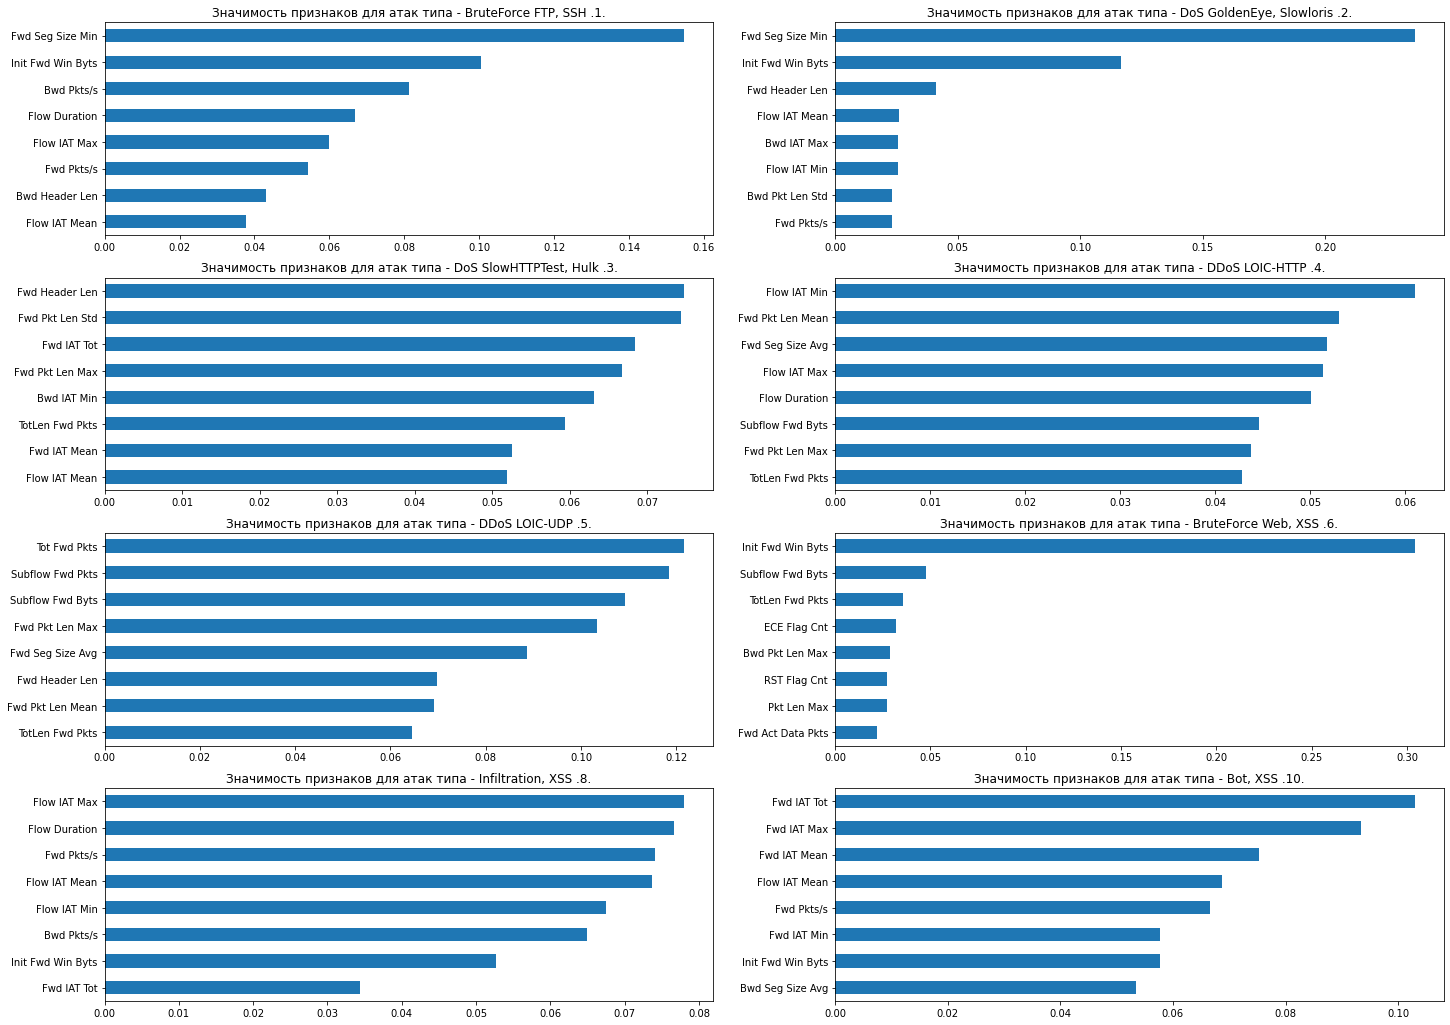

In [55]:
plt.figure(figsize=(24,18))
plt.subplot(4,2,1)
importnace_feateres_1\
                    .sort_values(ascending=True)\
                    .plot(kind="barh", title = 'Значимость признаков для атак типа - BruteForce FTP, SSH .1.')
plt.subplot(4,2,2)
importnace_feateres_2\
                    .sort_values(ascending=True)\
                    .plot(kind="barh", title = 'Значимость признаков для атак типа - DoS GoldenEye, Slowloris .2.')
plt.subplot(4,2,3)
importnace_feateres_3\
                    .sort_values(ascending=True)\
                    .plot(kind="barh", title = 'Значимость признаков для атак типа - DoS SlowHTTPTest, Hulk .3.')
plt.subplot(4,2,4)
importnace_feateres_4\
                    .sort_values(ascending=True)\
                    .plot(kind="barh", title = 'Значимость признаков для атак типа - DDoS LOIC-HTTP .4.')
plt.subplot(4,2,5)
importnace_feateres_5\
                    .sort_values(ascending=True)\
                    .plot(kind="barh", title = 'Значимость признаков для атак типа - DDoS LOIC-UDP .5.')
plt.subplot(4,2,6)
importnace_feateres_6\
                    .sort_values(ascending=True)\
                    .plot(kind="barh", title = 'Значимость признаков для атак типа - BruteForce Web, XSS .6.')
plt.subplot(4,2,7)
importnace_feateres_8\
                    .sort_values(ascending=True)\
                    .plot(kind="barh", title = 'Значимость признаков для атак типа - Infiltration, XSS .8.')
plt.subplot(4,2,8)
importnace_feateres_10\
                    .sort_values(ascending=True)\
                    .plot(kind="barh", title = 'Значимость признаков для атак типа - Bot, XSS .10.')

### Подготовка полного набора данных

In [30]:
col_cont_main_features = ['Fwd Seg Size Min', 'Bwd IAT Min', 'Fwd Pkt Len Max', 'Fwd Header Len', 
                          'Init Fwd Win Byts','Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Mean', 'Label']

In [31]:
%%time
db_1 = db_full_1[col_cont_main_features]
db_2 = db_full_2[col_cont_main_features]
db_3 = db_full_3[col_cont_main_features]
db_4 = db_full_4[col_cont_main_features]
db_5 = db_full_5[col_cont_main_features]
db_6 = db_full_6[col_cont_main_features]
db_7 = db_full_7[col_cont_main_features]
db_8 = db_full_8[col_cont_main_features]
db_9 = db_full_9[col_cont_main_features]
db_10 = db_full_10[col_cont_main_features]

CPU times: total: 1.11 s
Wall time: 2.09 s


#### Объединение наборов данных с отобранными признаками

In [32]:
main_db = pd.concat([db_1, db_2, db_3, db_4, db_5, db_6,
                    db_7, db_8, db_9, db_10], sort = False, axis = 0)

In [5]:
main_db = pd.read_csv('full_db_cut.csv')

In [6]:
main_db = main_db[['Fwd Seg Size Min', 'Bwd IAT Min', 'Fwd Pkt Len Max',
       'Fwd Header Len', 'Init Fwd Win Byts', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Mean', 'Label']]

In [240]:
main_db, categories = encode_class(main_db)

### Оценка важности признаков готового датасета

In [241]:
%%time
RandF, tr = feature_selection_RandomForest(main_db)

CPU times: total: 1h 18min 27s
Wall time: 1h 18min 36s


<AxesSubplot:title={'center':'Значимость признаков для общего датасета'}>

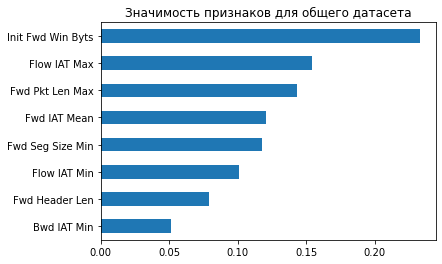

In [242]:
importnace_features_main_db = pd.Series(RandF.feature_importances_, tr.columns).sort_values(ascending = False)
importnace_features_main_db\
                    .sort_values(ascending=True)\
                    .plot(kind="barh", title = 'Значимость признаков для общего датасета')

In [244]:
corr = main_db.corr()

<AxesSubplot:>

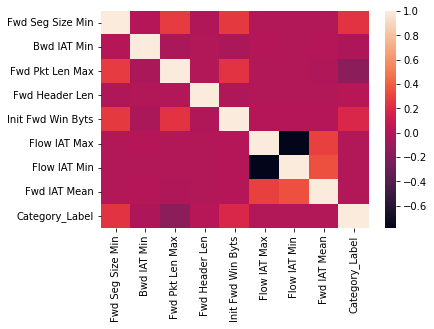

In [247]:
sns.heatmap(corr)

### Кодирование меток классов и подготовка обучающих и тестовых выборок

In [7]:
db = main_db.sample(frac = 1, random_state=2)

In [8]:
train_len = int(db.shape[0] * 0.2)

In [9]:
db_main_1 = db[:train_len]

In [10]:
db_main_1['Label'].unique()

array(['Benign', 'DDoS attacks-LOIC-HTTP', 'DoS attacks-Hulk',
       'DDOS attack-HOIC', 'Infilteration', 'FTP-BruteForce',
       'DoS attacks-SlowHTTPTest', 'SSH-Bruteforce', 'Bot',
       'DoS attacks-GoldenEye', 'DoS attacks-Slowloris',
       'Brute Force -Web', 'DDOS attack-LOIC-UDP', 'SQL Injection',
       'Brute Force -XSS'], dtype=object)

In [13]:
db_main_1['Category_Label'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=int64)

In [14]:
y = db_main_1['Category_Label']
X = db_main_1[['Fwd Seg Size Min', 'Fwd Pkt Len Max', 'Fwd Header Len', 'Init Fwd Win Byts',
       'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Mean']]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

## Метод дерева решений

In [64]:
DT = DecisionTreeClassifier()

In [65]:
%%time
DT.fit(X_train, y_train)

CPU times: total: 31.9 s
Wall time: 32.1 s


DecisionTreeClassifier()

In [66]:
%%time
DT_predict = DT.predict(X_test)

CPU times: total: 203 ms
Wall time: 192 ms


In [67]:
print( 'Accuracy score:', accuracy_score(y_test, DT_predict))

Accuracy score: 0.9800760182221963


In [68]:
cm = confusion_matrix(DT_predict,
                      y_test,
                      normalize='true')

Text(95.99999999999999, 0.5, 'True label')

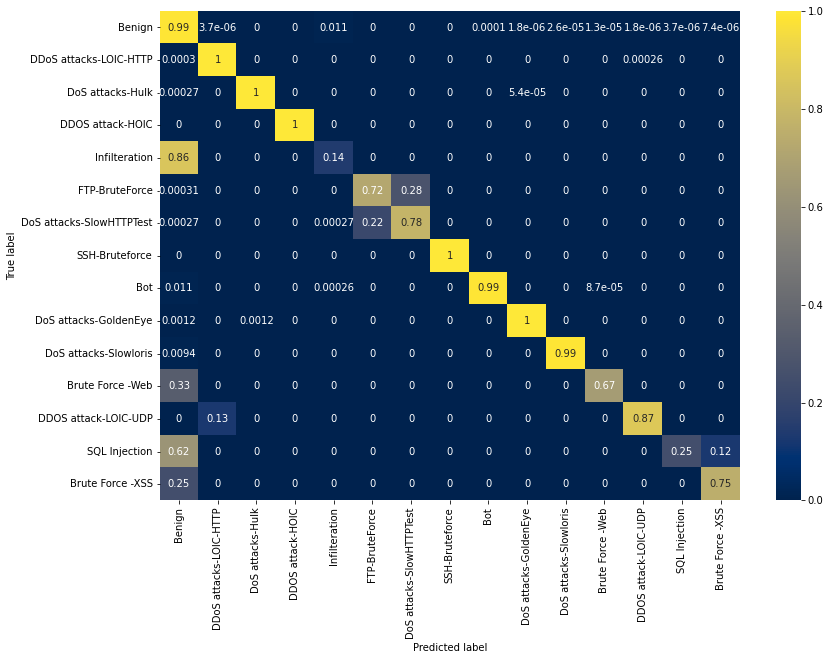

In [69]:
plt.figure(figsize=(13,9))
hm = sns.heatmap(cm,
            annot=True,
            xticklabels=categories.keys(),
            yticklabels=categories.keys(),
            cmap = 'cividis')
hm.set_xlabel('Predicted label')
hm.set_ylabel('True label')

## Метод Случайного дерева

In [39]:
RF = RandomForestClassifier()

In [40]:
%%time
RF.fit(X_train, y_train)

CPU times: total: 13min 21s
Wall time: 13min 22s


RandomForestClassifier()

In [41]:
%%time
RF_predict = RF.predict(X_test)

CPU times: total: 18.5 s
Wall time: 18.5 s


In [42]:
print( 'Accuracy score:', accuracy_score(y_test, RF_predict))

Accuracy score: 0.9835766142321636


In [83]:
cm = confusion_matrix(RF_predict,
                      y_test,
                      normalize='true')

Text(95.99999999999999, 0.5, 'True label')

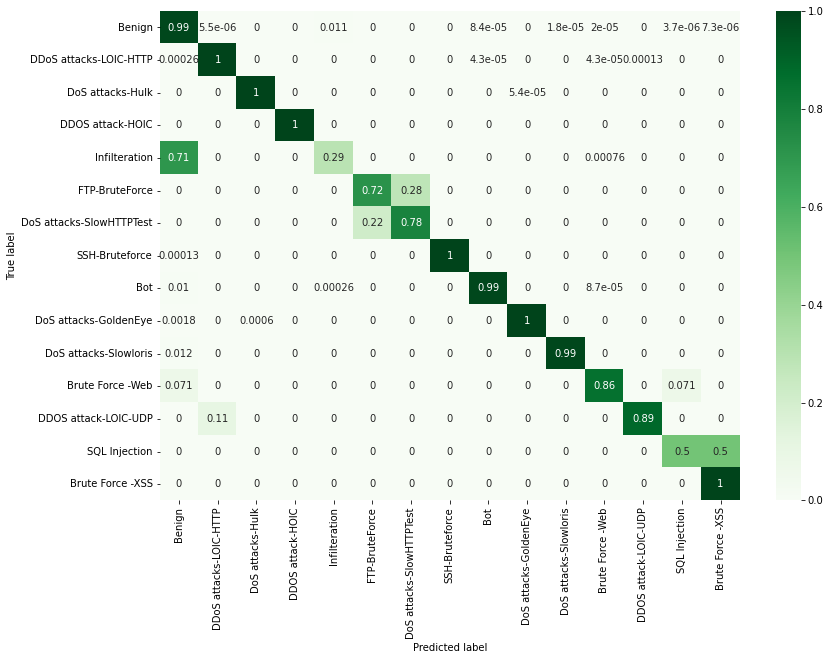

In [84]:
plt.figure(figsize=(13,9))
hm = sns.heatmap(cm,
            annot=True,
            xticklabels=categories.keys(),
            yticklabels=categories.keys(),
            cmap = 'Greens')
hm.set_xlabel('Predicted label')
hm.set_ylabel('True label')

#### Масштабирование призанков на основе  Z-оценки 

In [16]:
standart_scaler = StandardScaler()

In [17]:
X_stand = pd.DataFrame(data = standart_scaler.fit_transform(X), columns = X.columns)

In [18]:
X_train_stand, X_test_stand, y_train, y_test = train_test_split(X_stand,
                                                                y,
                                                                test_size=0.2,
                                                                random_state=1,
                                                                stratify=y)

## Метод K ближайших соседей

In [48]:
KNN = KNeighborsClassifier(n_neighbors=4)

In [49]:
%%time
KNN.fit(X_train_stand, y_train)

CPU times: total: 12 s
Wall time: 12 s


KNeighborsClassifier(n_neighbors=4)

In [50]:
%%time
KNN_predict = KNN.predict(X_test_stand)

CPU times: total: 4min 32s
Wall time: 4min 34s


In [51]:
print( 'Accuracy score:', accuracy_score(y_test, KNN_predict))

Accuracy score: 0.9841618436574991


In [81]:
cm = confusion_matrix(KNN_predict,
                      y_test,
                      normalize='true')

Text(95.99999999999999, 0.5, 'True label')

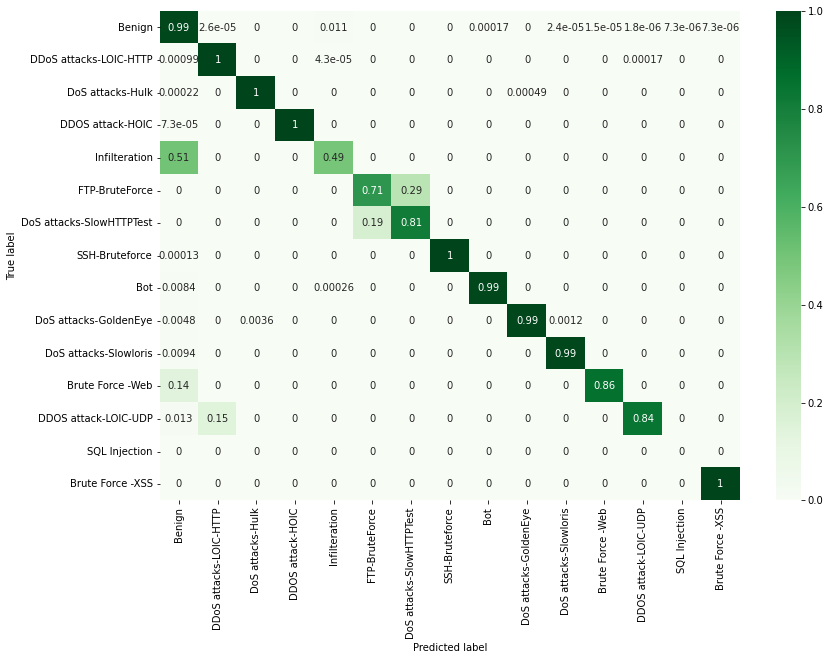

In [82]:
plt.figure(figsize=(13,9))
hm = sns.heatmap(cm,
            annot=True,
            xticklabels=categories.keys(),
            yticklabels=categories.keys(),
            cmap = 'Greens')
hm.set_xlabel('Predicted label')
hm.set_ylabel('True label')

## Метод Логистической регрессии 

In [61]:
LR = LogisticRegression(n_jobs=-1, C = 2, solver='lbfgs', max_iter=200)

In [62]:
%%time
LR.fit(X_train_stand, y_train)

CPU times: total: 312 ms
Wall time: 6min 38s


LogisticRegression(C=2, max_iter=200, n_jobs=-1)

In [63]:
LR_predict = LR.predict(X_test_stand)

In [64]:
print( 'Accuracy score:', accuracy_score(y_test, LR_predict))

Accuracy score: 0.8660379043858325


In [65]:
cm = confusion_matrix(LR_predict,
                      y_test,
                      normalize='true')

Text(95.99999999999999, 0.5, 'True label')

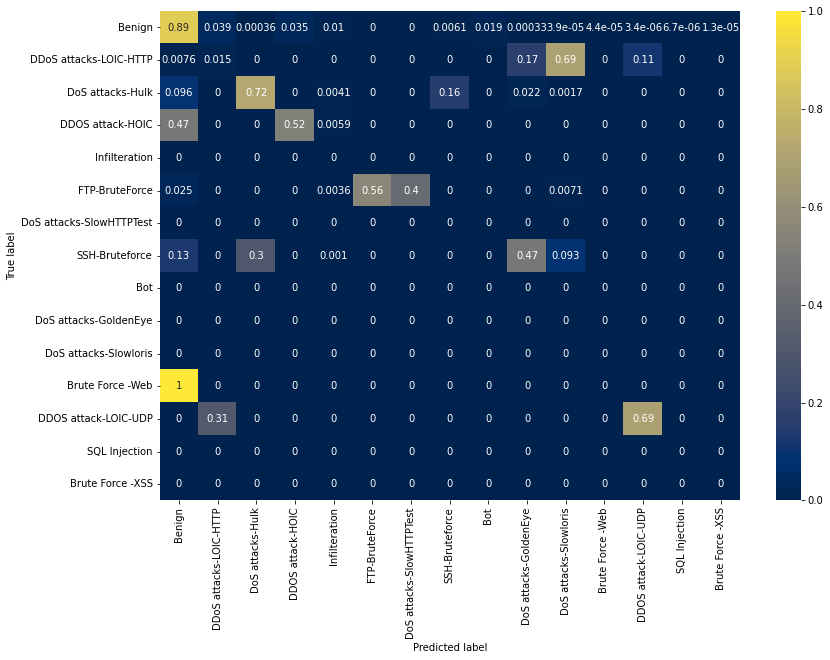

In [66]:
plt.figure(figsize=(13,9))
hm = sns.heatmap(cm,
            annot=True,
            xticklabels=categories.keys(),
            yticklabels=categories.keys(),
            cmap = 'cividis')
hm.set_xlabel('Predicted label')
hm.set_ylabel('True label')

# Еще сделаю СВМ и AdaBoost

## Метод Байеса

In [68]:
GNB = GaussianNB()

In [71]:
%%time
GNB.fit(X_train_stand, y_train)

CPU times: total: 562 ms
Wall time: 562 ms


GaussianNB()

In [72]:
%%time
GNB_predict = GNB.predict(X_test_stand)

CPU times: total: 688 ms
Wall time: 684 ms


In [73]:
accuracy_score(GNB_predict, y_test)

0.12290895986250189

In [74]:
cm = confusion_matrix(GNB_predict,
                      y_test,
                      normalize='true')

Text(95.99999999999999, 0.5, 'True label')

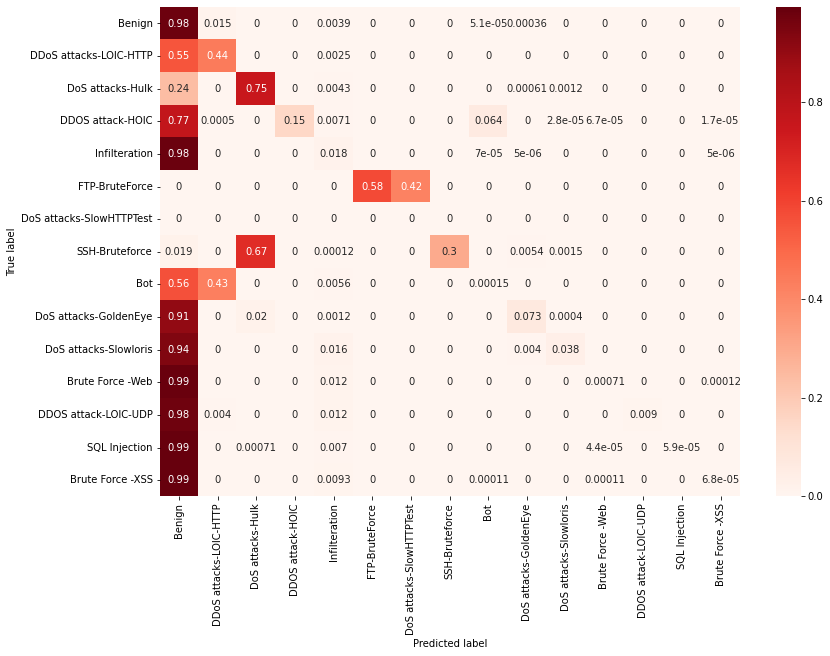

In [79]:
plt.figure(figsize=(13,9))
hm = sns.heatmap(cm,
            annot=True,
            xticklabels=categories.keys(),
            yticklabels=categories.keys(),
            cmap = 'Reds')
hm.set_xlabel('Predicted label')
hm.set_ylabel('True label')

## Метод AdaBoost

In [20]:
AB = AdaBoostClassifier()

In [32]:
%%time
AB.fit(X_train, y_train)

CPU times: total: 2min 55s
Wall time: 2min 57s


AdaBoostClassifier()

In [33]:
%%time
AB_predict = AB.predict(X_test)

CPU times: total: 11.8 s
Wall time: 11.9 s


In [75]:
accuracy_score(AB_predict, y_test)

0.8306469249273853